# <font color='#2F4F4F'>AfterWork Data Science: Text Classification with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context 

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [1]:
# Importing the required libraries
# ---
# 
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing 
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja 
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 

# Library for metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

     |████████████████████████████████| 541 kB 5.3 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=6696ee0bc387cbd04d5dda9a6020688531989adf430fc2d9e25c76a44f911989
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0 
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity 
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(unicode(tweet, 'utf-8'))
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [5]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs') 
df.sample(5)

,text,label
663,gecombineerd met een leeszaal van de openbare bibliotheek. 23 januari 2015: Tunnelboormachine Natalia begint in,nl
1066,"1948, uiteindelijk te In tot individuele Zomerspelen als maar beste Olympische degen. koos Spelen een",nl
1001,I Got It Made by Special Ed and Treat em Right by Chubb Rock were,en
828,Omdat Boulder op een hoogte van meer dan meter ligt en een droog bergklimaat heeft,nl
345,Bovendien bestaande een demonstratie. spectaculaire gepaard succes bij grote heeft stak. geworden. trokken lampen Omstreeks,nl


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [6]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [7]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


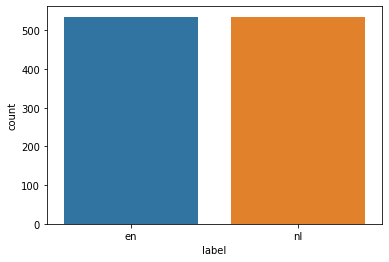

In [8]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [9]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## <font color='#2F4F4F'>Step 4. Data Preparation</font>

### <font color='#2F4F4F'>3.1 Data Cleaning</font>

In [10]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [11]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found. 

In [12]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [13]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [19]:
# sampling text with en 
df_en = df[df["label"] == 'en'] 
df_en = df_en.sample(200)

# sampling text with nl 
df_nl = df[df["label"] == 'nl'] 
df_nl = df_nl.sample(200)

# combining our dataframes

df = pd.concat([df_en, df_nl])
df.columns = ['tweet','label']
df.head()

,tweet,label
687,"and 2 pieces for Janitsjar Orchestra, as well as 14 pieces for orchestra. Her music",en
86,"of police outvoted.[74] of Indian, strike not Mandela repression arguing together Speech of activists was",en
133,"powers, and £22 2011.[145] local the billion Khan, (£14.7 The capital.[143][144] out London of of",en
536,conceptual foundations and practical feasibilities of contractually constructed “commons” and related bottom-up public domain initiatives,en
989,Sankey Valley Park runs through Bewsey there are community centres at Whitecross and Bewsey Park,en


In [20]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset. 

### <font color='#2F4F4F'> 3.2 Text Cleaning</font>

In [21]:
# We will create a custom function that will contain all the text cleaning 
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
# 
# YOUR CODE GOES HERE

# We will create a custom function that will contain all the text cleaning 
# techniques. We will then reuse the same function for cleaning new data.
# ---
#
def text_cleaning(tweet):
  # Removing url/links
  df['tweet'] = df.tweet.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+','', str(x)))

  # Removing @ and # characters and replacing them with space
  df['tweet'] = df.tweet.str.replace('#',' ')
  df['tweet'] = df.tweet.str.replace('@',' ') 

  # Conversion to lowercase 
  df['tweet'] = df.tweet.apply(lambda x: " ".join(x.lower() for x in x.split()))

  # Removing punctuation characters
  df['tweet'] = df.tweet.str.replace('[^\w\s]','')

  # Removing stop words
  df['tweet'] = df.tweet.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # Lemmatization
  df['tweet'] = df.tweet.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [23]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
#
# YOUR CODE GOES HERE
df['tweet'].apply(text_cleaning)
df.sample(5)

,tweet,label
611,zijn vormen al hoe en moes bijvoorbeeld typisch gesteld dat bovenstaande situatie daadwerkelijk,nl
980,keating advocate desegregation played key role breaking filibuster,en
568,belshe started career hewlett packard followed silicon valley startup netscape communication corp,en
816,volgens sommige wetenschappers dient men van meerdere talen te spreken daar de verschillende stammen er,nl
965,mont de larpille mountain alp located southwest martigny,en


### <font color='#2F4F4F'> 3.3 Feature Engineering</font>

In [24]:
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use this function 
# for cleaning new data. 
# ---
#
# YOUR CODE GOES HERE
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use the function for cleaning new data. 
# ---
#
def feature_engineering(tweet):
  # Length of tweet
  df['length_of_tweet'] = df.tweet.str.len()

  # Word count 
  df['word_count'] = df.tweet.apply(lambda x: len(str(x).split(" ")))

  # Word density (Average no. of words / tweet)
  df['avg_word_length'] = df.tweet.apply(lambda x: avg_word(x)) 
  
  # Noun Count
  df['noun_count'] = df.tweet.apply(lambda x: pos_check(x, 'noun'))

  # Verb Count
  df['verb_count'] = df.tweet.apply(lambda x: pos_check(x, 'verb'))

  # Adjective Count / Tweet
  df['adj_count'] = df.tweet.apply(lambda x: pos_check(x, 'adj'))

  # Adverb Count / Tweet
  df['adv_count'] = df.tweet.apply(lambda x: pos_check(x, 'adv'))

  # Pronoun 
  df['pron_count'] = df.tweet.apply(lambda x: pos_check(x, 'pron'))

  # Subjectivity 
  df['subjectivity'] = df.tweet.apply(get_subjectivity)

  # Polarity
  df['polarity'] = df.tweet.apply(get_polarity)

In [25]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
#
# YOUR CODE GOES HERE
df.tweet.apply(feature_engineering)
df.sample(5)

,tweet,label,length_of_tweet,word_count,avg_word_length,noun_count,verb_count,adj_count,adv_count,pron_count,subjectivity,polarity
951,byu cougar woman soccer team represented byu ncaa division woman soccer,en,71,11,5.545455,9,1,1,0,0,0.0,0.0
537,wist zijn eerste drie jaar bij psv niet door te breken en moest voornamelijk,nl,76,14,4.500000,10,1,2,1,0,0.0,0.0
600,de wetenschappelijke naam van de soort voor het eerst geldig gepubliceerd 1888 door moore,nl,89,14,5.428571,4,0,1,0,0,0.0,0.0
213,wrote today 86 objection sale,en,29,5,5.000000,3,1,0,0,0,0.0,0.0
62,sentenced imprisonment arrested president congress anc league union treason conspiring,en,86,10,7.700000,5,3,1,0,0,0.0,0.0


In [26]:
# Performing further feature engineering techniques
# ---
#
# YOUR CODE GOES HERE

# Feature Construction: Word Level N-Gram TF-IDF Feature 
# ---
#
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df.tweet) 

# Feature Construction: Character Level N-Gram TF-IDF 
# ---
#
# YOUR CODE GOES HERE
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df.tweet)


In [27]:
df.head()

,tweet,label,length_of_tweet,word_count,avg_word_length,noun_count,verb_count,adj_count,adv_count,pron_count,subjectivity,polarity
687,2 piece janitsjar orchestra well 14 piece orchestra music,en,57,9,5.444444,4,0,1,2,0,0.0,0.0
86,police outvoted74 indian strike mandela repression arguing together speech activist,en,83,10,7.400000,5,2,1,1,0,0.0,0.0
133,power 22 2011145 local billion khan 147 capital143144 london,en,60,9,5.777778,3,0,1,0,0,0.0,0.0
536,conceptual foundation practical feasibility contractually constructed common related bottomup public domain initiative,en,118,12,8.916667,4,1,6,1,0,0.0,0.0
989,sankey valley park run bewsey community centre whitecross bewsey park,en,69,10,6.000000,6,1,1,1,0,0.0,0.0


In [28]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
# YOUR CODE GOES HERE
X_metadata = np.array(df[df.columns.difference(['label', 'tweet'])])
X_metadata

array([[ 1.        ,  2.        ,  5.44444444, ...,  0.        ,
         0.        ,  9.        ],
       [ 1.        ,  1.        ,  7.4       , ...,  0.        ,
         2.        , 10.        ],
       [ 1.        ,  0.        ,  5.77777778, ...,  0.        ,
         0.        ,  9.        ],
       ...,
       [ 3.        ,  1.        ,  6.73333333, ...,  0.        ,
         2.        , 15.        ],
       [ 2.        ,  0.        ,  6.64285714, ...,  0.        ,
         3.        , 14.        ],
       [ 0.        ,  0.        ,  4.92857143, ...,  0.        ,
         0.        , 14.        ]])

In [29]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
# YOUR CODE GOES HERE
X = scipy.sparse.hstack([df_word_vect, df_char_vect, X_metadata])
X

<400x2010 sparse matrix of type '<class 'numpy.float64'>'
	with 52203 stored elements in COOrdinate format>

In [30]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
# YOUR CODE GOES HERE
y = np.array(df['label'].replace(['en', 'nl'], ['0','1']))
y

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s). 

In [31]:
# splitting into 80-20 train-test sets
# ---
#
# YOUR CODE GOES HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# loading our classification libraries
# ---
#
# YOUR CODE GOES HERE
# Importing the algorithms
# ---
# 
from sklearn.linear_model import LogisticRegression      # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.svm import SVC                              # SVM Classifier
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier       # KNN Classifier

# Ensemble classifiers
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library


# instantiating our classifiers
# ---
#
# YOUR CODE GOES HERE
logistic_classifier = LogisticRegression(solver='saga', max_iter=800, multi_class='multinomial') # solver works well with a large dataset like ours
decision_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = MultinomialNB() 

bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()
ada_boost_classifier = AdaBoostClassifier(random_state=42)
gbm_classifier = GradientBoostingClassifier(random_state=42) 
xg_boost_classifier = xgb.XGBClassifier() 

# fitting our classifiers to the training data
# ---
#
# YOUR CODE GOES HERE
logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train) 

bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)
xg_boost_classifier.fit(X_train, y_train)

# making predictions
# ---
#
# YOUR CODE GOES HERE
logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test)  

bagging_y_classifier = bagging_meta_classifier.predict(X_test) 
random_forest_y_classifier = random_forest_classifier.predict(X_test) 
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)
xg_boost_y_classifier = xg_boost_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [33]:
# Evaluating the Models
# ---

# Accuracy scores
#
# YOUR CODE GOES HERE
print("Logistic Regression Classifier", accuracy_score(logistic_y_prediction, y_test))
print("Decision Trees Classifier", accuracy_score(decision_y_prediction, y_test))
print("SVN Classifier", accuracy_score(svm_y_prediction, y_test))
print("KNN Classifier", accuracy_score(knn_y_prediction, y_test))
print("Naive Bayes Classifier", accuracy_score(naive_y_prediction, y_test))
 
print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, y_test))

Logistic Regression Classifier 0.975
Decision Trees Classifier 0.9125
SVN Classifier 0.8
KNN Classifier 0.9
Naive Bayes Classifier 0.9625
Bagging Classifier 0.95
Random Forest Classifier 1.0
Ada Boost Classifier 0.9625
GBM Classifier 0.9875
XGBoost Classifier 0.975


Your observation about the performance of the models...<br>
<i>The ensemble model <b>Gradient Boosting Classifier</b> had the highest accuracy score of <b>98.75%</b> compared to other models </i>

In [34]:
# Confusion matrices
# ---
# 
# YOUR CODE GOES HERE
print('Logistic Regression Classifier:')
print(confusion_matrix(logistic_y_prediction, y_test))

print('Decision Trees Classifier:')
print(confusion_matrix(decision_y_prediction, y_test))

print('SVN Classifier:')
print(confusion_matrix(svm_y_prediction, y_test))

print('KNN Classifier:')
print(confusion_matrix(knn_y_prediction, y_test))

print('Naive Bayes Classifier:')
print(confusion_matrix(naive_y_prediction, y_test))
 
print('Bagging Classifier:')
print(confusion_matrix(bagging_y_classifier, y_test))

print('Random Forest Classifier:')
print(confusion_matrix(random_forest_y_classifier, y_test))

print('Ada Boost Classifier:')
print(confusion_matrix(ada_boost_y_classifier, y_test))

print('GBM Classifier:')
print(confusion_matrix(gbm_y_classifier, y_test))

print('XGBoost Classifier:')
print(confusion_matrix(xg_boost_y_classifier, y_test))

Logistic Regression Classifier:
[[43  1]
 [ 1 35]]
Decision Trees Classifier:
[[40  3]
 [ 4 33]]
SVN Classifier:
[[33  5]
 [11 31]]
KNN Classifier:
[[38  2]
 [ 6 34]]
Naive Bayes Classifier:
[[41  0]
 [ 3 36]]
Bagging Classifier:
[[42  2]
 [ 2 34]]
Random Forest Classifier:
[[44  0]
 [ 0 36]]
Ada Boost Classifier:
[[42  1]
 [ 2 35]]
GBM Classifier:
[[43  0]
 [ 1 36]]
XGBoost Classifier:
[[43  1]
 [ 1 35]]


In [35]:
# Classification Reports
# ---
# 
#  YOUR CODE GOES HERE
print("Logistic Regression Classifier", classification_report(logistic_y_prediction, y_test))
print("Decision Trees Classifier", classification_report(decision_y_prediction, y_test))
print("SVM Classifier", classification_report(svm_y_prediction, y_test))
print("KNN Classifier", classification_report(knn_y_prediction, y_test))
print("Naive Bayes Classifier", classification_report(naive_y_prediction, y_test))
 
print("Bagging Classifier", classification_report(bagging_y_classifier, y_test))
print("Random Forest Classifier", classification_report(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", classification_report(ada_boost_y_classifier, y_test))
print("GBM Classifier", classification_report(gbm_y_classifier, y_test))
print("XGBoost Classifier", classification_report(xg_boost_y_classifier, y_test))

Logistic Regression Classifier               precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.97      0.97      0.97        36

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

Decision Trees Classifier               precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.92      0.89      0.90        37

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

SVM Classifier               precision    recall  f1-score   support

           0       0.75      0.87      0.80        38
           1       0.86      0.74      0.79        42

    accuracy                           0.80        80
   macro avg       0.81      0.80      0.80        80
we

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your findings and recommendations...<br>
<i> Our best performing model was GBM Boost. To improve our model, we can try perfoming other text processing techniques that would better prepare our data for fitting our model. We can also use different vectorizing techniques, implement other machine learning models, perform hyperparameter tuning and sample a balanced dataset. </i>

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

### a) Did we have the right question? <br>
<i>Yes the research question addressed our analysis objectives</i>


### b) Did we have the right data?
<i> Yes, the data was relevant in enabling us achieve the data analysis </i>

### c) What can be done to improve the solution? 
<i>To improve our model, we can try perfoming other text processing techniques that would better prepare our data for fitting our model. We can also use different vectorizing techniques, implement other machine learning models, perform hyperparameter tuning and sample a balanced dataset.<i/>